## FITS file handling in python

The FITS file is a standard format for communicating raw, astronomical data. Being fluent in fits file handling is an incredibly valuable tool for researchers. This is a quickstart guide for the basics of fits file handling in Python. 

.fits files have two formats: images and tables. Telescopes will output image data, and processed data can be put into tables for later analysis. This notebook will give a quick tutorial on how to: 
1. open and get information on fits files
1. read, and display images
2. read, create, manipulate, and save fits tables

Before you can run this notebook, you must have the astropy and matplotlib libaries installed. If you are working on the Hyperion server, these libraries should already be installed. If you are running on your own Mac, installation is a simple pip call. If you're on a PC...just use the Hyperion server. 

### FITS files

###### Opening a FITS file and Examining Its contents

In [1]:
from astropy.io import fits

In [2]:
image_path = "AlberioVFits.00000103.FIT"
file = fits.open(image_path)

# we get the below warning because the SBIG instrument outputs an older version of FITS files. 
# do not worry, the astropy library can handle it. 

In [3]:
#the info method gives you information on what type of information is contained in the fits file
file.info()

Filename: AlberioVFits.00000103.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      46   (765, 510)   int16 (rescales to uint16)   


From the above information, one can tell that the first (and only) block of information is called "PRIMARY". The Dimensions is an integer tuple (765, 510), denoting that this is an image with pixel dimensions 765x510. This info will look different for tables. 

We know that this file has an image in it, so let's practice taking a look at the image. 

## Read and Display Images

In [4]:
#taking the file and getting the PRIMARY imformation block
image = file[0]

#getting a 2-D array of the image data
image_data = image.data

The below cell demonstrates that `image_data` is a 2-D array, which is a data type that had a height and a width, where each entry represents a pixel in the image. Accordingly, the array's `shape` will have dimensions 510 by 765.

In [5]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(510, 765)


Like any 2-D array, we can visually represent the number of counts in each pixel by graphing it as follows:

In [6]:
import matplotlib.pyplot as plt

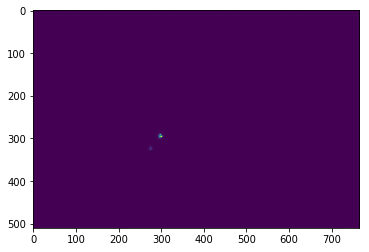

In [7]:
plt.imshow(image_data)
plt.show()

This looks unimpressive. We can change the scaling of the colorbar such that we can see more details in the image:

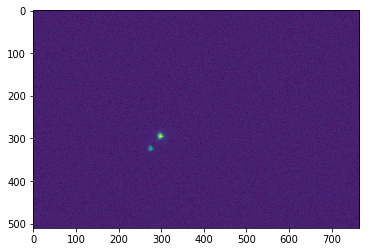

In [8]:
#since we see in logaritmic scales, using LogNorm is common
from matplotlib.colors import LogNorm

plt.imshow(image_data, norm=LogNorm())
plt.show()

Now let's polish the look a little:

/usr/local/anaconda3-2019/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


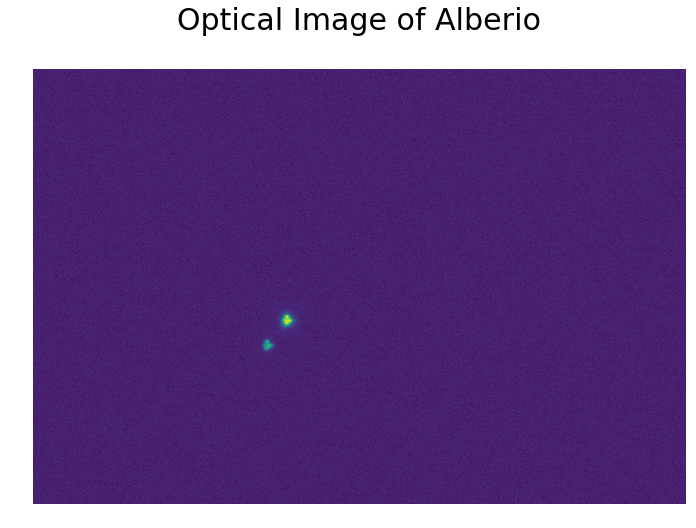

In [9]:
import matplotlib as mpl
mpl.rc('font',family='Georgia')

plt.title("Optical Image of Alberio\n", fontsize=30)

#make the image bigger
fig = mpl.pyplot.gcf()
x, y = 2*fig.get_size_inches()
fig.set_size_inches(x, y)

#remove the axes
plt.axis('off')

plt.imshow(image_data, norm=LogNorm())
plt.show()

looks good. Now let's move on to fits tables. 

## FITS Tables

I created an example table for this tutorial called `example_table.fits`. Let's take a look. 

In [10]:
from astropy.table import Table

In [11]:
table_path = "example_table.fits"
file = fits.open(table_path)
file.info()

Filename: example_table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     16   4R x 4C   [10A, D, D, D]   


As you can see here, there now two blocks of information. The first block, PrimaryHDU, is dimensionless, meaning it is holding no data. The documentation suggests that the PrimaryHDU (always at the zeroth index) can only hold image data. 

The table data is held in the second information block, is at index 1. The dimensions are "4R x 4C", meaning there are 4 rows and 4 columns. Now let's see what is in the table. 

### Opening and Reading a FITS table

In [12]:
data = Table.read("example_table.fits")

In [13]:
#print the table:
data

File_Name,Redshift,RA,DEC
bytes10,float64,float64,float64
catalog_1,0.8104636934585836,248.45253856680293,-4.0906689647715835
catalog_3,0.9109133208050747,7.799631868588346,44.7137237430195
catalog_6,0.25997250318522114,283.67217310927066,-5.344165569866675
catalog_13,0.05618768612815106,166.2621552214357,13.17955452303134


This is a relatively simple table with four columns. The very first row of the table shows the name of the columns, the next row tells you the data type of the entries in the column. Then comes the data. Let's see how to access the data. 

If we want the redshift of catalog 6, the third entry:

In [14]:
#note that the list starts at index 0, like a normal array
data['Redshift'][2]

0.25997250318522114

clearly, the name of the column is important. A quick way to access the column names is as follows:

In [15]:
#print the column names of the table:
data.colnames

['File_Name', 'Redshift', 'RA', 'DEC']

In [16]:
#if you don't want to rely on column names and know the index of the columns:
data[2][1]

0.25997250318522114

if we did not know that catalog 6 was at index 2, we can use masks. This is a really useful tool, but is not of immediate importance, so I will put it at the end as an appendix. 

Next up, is editing a table.

### Editing a Table

In [17]:
from astropy.table import Column

Let's say we want number the rows. This is how you would do that:

In [18]:
#note that the length of all the columns have to be the same.
data['Number'] = range(4)

In [19]:
data

File_Name,Redshift,RA,DEC,Number
bytes10,float64,float64,float64,int64
catalog_1,0.8104636934585836,248.45253856680293,-4.0906689647715835,0
catalog_3,0.9109133208050747,7.799631868588346,44.7137237430195,1
catalog_6,0.25997250318522114,283.67217310927066,-5.344165569866675,2
catalog_13,0.05618768612815106,166.2621552214357,13.17955452303134,3


### Saving a Table

In [20]:
import os #package that does command-line arguments from python scripts
if os.path.exists("new_table_example.fits"):
    os.remove("new_table_example.fits")
data.write("new_table_example.fits")

# Appendix: Masks

Masks are a very useful tool when you want to find a specific value or set of values in the table. 

For example, if we want to find the redshift of catalog 6:

In [21]:
mask = (data['File_Name']=="catalog_6")
print(mask)

[False False  True False]


you can see that this creates a Boolean (true/false) array, where the `True` value corresponds to where `t['File_Name']=="catalog_6"` is true. Let's put this mask to good use:

In [22]:
data[mask]

File_Name,Redshift,RA,DEC,Number
bytes10,float64,float64,float64,int64
catalog_6,0.25997250318522114,283.67217310927066,-5.344165569866675,2


This returns a table where the "True" indices are displayed and the "False" indices are not. In total, if we want to get the redshift of catalog 13, this would be the procedure:

In [23]:
mask = (data['File_Name']=="catalog_13")
data[mask]["Redshift"][0]

0.05618768612815106

In [24]:
#note:
data[mask]["Redshift"] #gives the entire column. 

0.05618768612815106


You can also use masks to make data cuts. For example, if we want to get all object with redshift above 0.5:

In [25]:
mask = (data['Redshift'] > 0.5)
data[mask]

File_Name,Redshift,RA,DEC,Number
bytes10,float64,float64,float64,int64
catalog_1,0.8104636934585836,248.45253856680293,-4.0906689647715835,0
catalog_3,0.9109133208050747,7.799631868588346,44.7137237430195,1
